In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
train_df.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Анализ данных

In [8]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [10]:
train_df[['MSZoning', 'SalePrice']].groupby(['MSZoning'], as_index=False).mean().sort_values(by='SalePrice', ascending=False) # <- сильно влияет
# C = 1, RM = 2, RH = 3, RL = 4, FV = 5

,MSZoning,SalePrice
1,FV,214014.061538
3,RL,191004.994787
2,RH,131558.375000
4,RM,126316.830275
0,C (all),74528.000000


In [11]:
train_df[['LotFrontage', 'SalePrice']].groupby(['LotFrontage'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
# Линейный отрезок улицы, соединенный с участком

,LotFrontage,SalePrice
105,160.0,745000.000000
75,104.0,473333.333333
87,118.0,415000.000000
102,150.0,375000.000000
78,107.0,342947.571429
...,...,...
21,50.0,122563.719298
4,33.0,113000.000000
0,21.0,94278.260870
16,45.0,80500.000000


In [12]:
train_df[['LotArea', 'SalePrice']].groupby(['LotArea'], as_index=False).mean().sort_values(by='SalePrice', ascending=False) 
# LotArea: Размер участка в квадратных футах

,LotArea,SalePrice
1029,21535,755000.0
966,15623,745000.0
1056,35760,625000.0
850,12919,611657.0
973,16056,556581.0
...,...,...
119,5600,55000.0
51,3636,55000.0
68,4118,52500.0
69,4130,52000.0


In [13]:
train_df[['LotShape', 'SalePrice']].groupby(['LotShape'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
# Форма участка: Общая форма объекта недвижимости

,LotShape,SalePrice
1,IR2,239833.365854
2,IR3,216036.500000
0,IR1,206101.665289
3,Reg,164754.818378


In [14]:
train_df[['Utilities', 'SalePrice']].groupby(['Utilities'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
# Коммунальные услуги: Тип доступных коммунальных услуг

,Utilities,SalePrice
0,AllPub,180950.95682
1,NoSeWa,137500.00000


In [15]:
train_df[['Neighborhood', 'SalePrice']].groupby(['Neighborhood'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Neighborhood,SalePrice
15,NoRidge,335295.317073
16,NridgHt,316270.623377
22,StoneBr,310499.000000
23,Timber,242247.447368
24,Veenker,238772.727273
21,Somerst,225379.837209
4,ClearCr,212565.428571
6,Crawfor,210624.725490
5,CollgCr,197965.773333
0,Blmngtn,194870.882353


In [16]:
train_df[train_df['Neighborhood'] == 'Blmngtn'].sort_values(by='SalePrice', ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
639,640,120,RL,53.0,3982,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,264561
1394,1395,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578
559,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,234000
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000
1019,1020,120,RL,43.0,3013,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,213490
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
229,230,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,192500
385,386,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,192000
1023,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,191000
1004,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,181000


In [17]:
train_df[['Condition1', 'SalePrice']].groupby(['Condition1'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Condition1,SalePrice
3,PosA,225875.000000
4,PosN,215184.210526
8,RRNn,212400.000000
7,RRNe,190750.000000
2,Norm,184495.492063
6,RRAn,184396.615385
1,Feedr,142475.481481
5,RRAe,138400.000000
0,Artery,135091.666667


In [19]:
train_df[['OverallQual', 'SalePrice']].groupby(['OverallQual'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
# Общее качество: Общее качество материалов и отделки

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [20]:
train_df[['YearRemodAdd', 'SalePrice']].groupby(['YearRemodAdd'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,YearRemodAdd,SalePrice
60,2010,336963.500000
59,2009,284085.391304
58,2008,269709.100000
56,2006,229471.134021
57,2007,224807.250000
...,...,...
32,1982,121271.428571
4,1954,121142.857143
21,1971,120230.555556
0,1950,117463.056180


In [21]:
train_df[['MasVnrArea', 'SalePrice']].groupby(['MasVnrArea'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
# Площадь каменной кладки: площадь облицовки каменной кладки в квадратных футах

,MasVnrArea,SalePrice
324,1170.0,755000.0
325,1378.0,625000.0
306,760.0,611657.0
290,603.0,538000.0
305,748.0,501837.0
...,...,...
291,604.0,89500.0
252,435.0,89471.0
235,381.0,88000.0
241,408.0,83000.0


In [22]:
train_df[['ExterQual', 'SalePrice']].groupby(['ExterQual'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,ExterQual,SalePrice
0,Ex,367360.961538
2,Gd,231633.510246
3,TA,144341.313466
1,Fa,87985.214286


In [23]:
train_df[train_df['ExterQual'] == 'TA'].sort_values(by='SalePrice', ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
608,609,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Alloca,359100
320,321,60,RL,111.0,16259,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,342643
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,52500
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311


In [24]:
train_df[['TotalBsmtSF', 'SalePrice']].groupby(['TotalBsmtSF'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,TotalBsmtSF,SalePrice
713,2444,755000.0
712,2396,745000.0
710,2330,611657.0
690,1992,556581.0
716,3094,555000.0
...,...,...
74,683,61000.0
5,290,60000.0
80,693,52500.0
4,270,52000.0


In [25]:
train_df[['Heating', 'SalePrice']].groupby(['Heating'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Heating,SalePrice
1,GasA,182021.195378
2,GasW,166632.166667
4,OthW,125750.000000
5,Wall,92100.000000
3,Grav,75271.428571
0,Floor,72500.000000


In [26]:
train_df[['HeatingQC', 'SalePrice']].groupby(['HeatingQC'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,HeatingQC,SalePrice
0,Ex,214914.429150
2,Gd,156858.871369
4,TA,142362.876168
1,Fa,123919.489796
3,Po,87000.000000


In [27]:
train_df[['CentralAir', 'SalePrice']].groupby(['CentralAir'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,CentralAir,SalePrice
1,Y,186186.709890
0,N,105264.073684


In [28]:
train_df[['1stFlrSF', 'SalePrice']].groupby(['1stFlrSF'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,1stFlrSF,SalePrice
745,2444,755000.0
744,2411,745000.0
686,1831,625000.0
741,2364,611657.0
713,1992,556581.0
...,...,...
1,372,55000.0
42,693,52500.0
26,649,40000.0
0,334,39300.0


In [29]:
train_df[['GrLivArea', 'SalePrice']].groupby(['GrLivArea'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
# Общая жилая площадь: Жилая площадь над уровнем моря (цокольный этаж), кв. фут

,GrLivArea,SalePrice
857,4316,755000.0
858,4476,745000.0
856,3627,625000.0
772,2364,611657.0
836,2822,582933.0
...,...,...
9,693,52500.0
14,729,52000.0
289,1317,40000.0
0,334,39300.0


In [30]:
train_df[['BsmtFullBath', 'SalePrice']].groupby(['BsmtFullBath'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,BsmtFullBath,SalePrice
2,2,213063.066667
1,1,202522.918367
3,3,179000.000000
0,0,165521.640187


In [31]:
train_df[['KitchenQual', 'SalePrice']].groupby(['KitchenQual'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,KitchenQual,SalePrice
0,Ex,328554.670000
2,Gd,212116.023891
3,TA,139962.511565
1,Fa,105565.205128


In [32]:
train_df[['Fireplaces', 'SalePrice']].groupby(['Fireplaces'], as_index=False).mean().sort_values(by='SalePrice', ascending=False) 

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


In [33]:
train_df[['FireplaceQu', 'SalePrice']].groupby(['FireplaceQu'], as_index=False).mean().sort_values(by='SalePrice', ascending=False) 

,FireplaceQu,SalePrice
0,Ex,337712.500000
2,Gd,226351.415789
4,TA,205723.488818
1,Fa,167298.484848
3,Po,129764.150000


In [34]:
train_df['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

In [35]:
train_df[['YrSold', 'SalePrice']].groupby(['YrSold'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,YrSold,SalePrice
1,2007,186063.151976
0,2006,182549.458599
3,2009,179432.103550
4,2010,177393.674286
2,2008,177360.838816


In [37]:
train_df[['SaleType', 'SalePrice']].groupby(['SaleType'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,SaleType,SalePrice
6,New,274945.418033
2,Con,269600.000000
1,CWD,210600.000000
4,ConLI,200390.000000
8,WD,173401.836622
0,COD,143973.255814
5,ConLw,143700.000000
3,ConLD,138780.888889
7,Oth,119850.000000


Лишние столбцы = (Id, MSSubClass, Alley, LandContour, LandSlope, LotConfig, Street, BldgType, HouseStyle, OverallCond, YearBuilt, RoofStyle, RoofMatl, Exterior1st,  Exterior2nd, MasVnrType, ExterCond, BsmtQual, BsmtExposure, Foundation, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2,  BsmtUnfSF, Electrical, LowQualFinSF, FullBath, HalfBath, BsmtHalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Functional, GarageType, GarageYrBlt, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Fence, MiscFeature, MiscVal, MoSold, SaleCondition, Condition2)

### Анализ с помощью визуализации данных

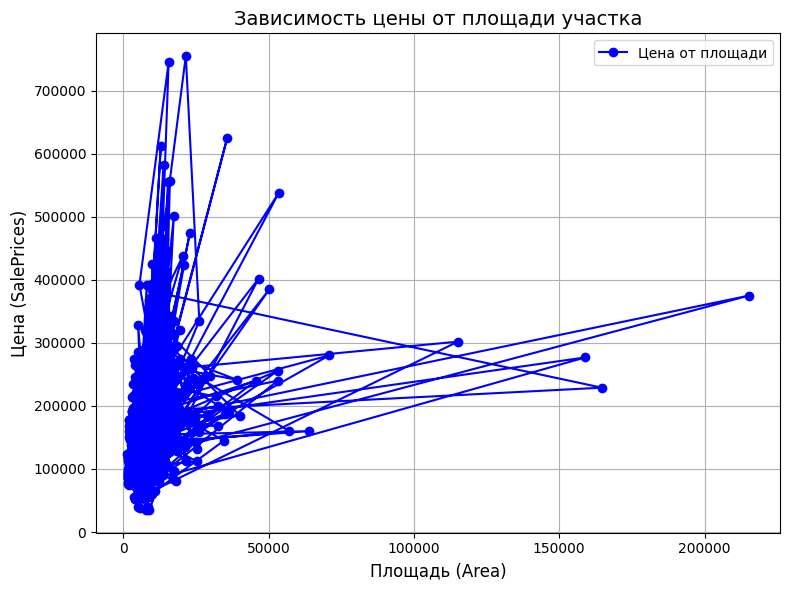

In [38]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(train_df['LotArea'], train_df['SalePrice'], marker='o', linestyle='-', color='b', label='Цена от площади')

# Настройка графика
plt.title('Зависимость цены от площади участка', fontsize=14)
plt.xlabel('Площадь (Area)', fontsize=12)
plt.ylabel('Цена (SalePrices)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Показ графика
plt.show()

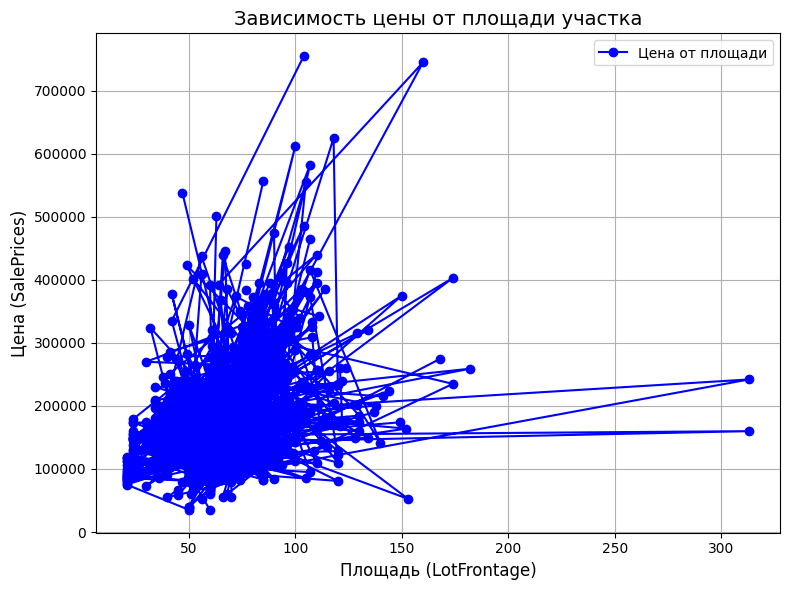

In [39]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(train_df['LotFrontage'], train_df['SalePrice'], marker='o', linestyle='-', color='b', label='Цена от площади')

# Настройка графика
plt.title('Зависимость цены от площади участка', fontsize=14)
plt.xlabel('Площадь (LotFrontage)', fontsize=12)
plt.ylabel('Цена (SalePrices)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Показ графика
plt.show()

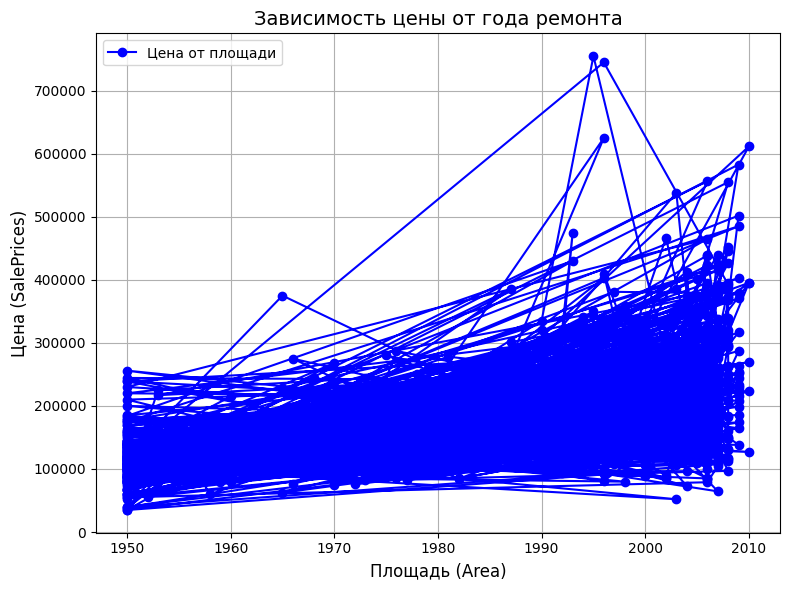

In [40]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(train_df['YearRemodAdd'], train_df['SalePrice'], marker='o', linestyle='-', color='b', label='Цена от площади')

# Настройка графика
plt.title('Зависимость цены от года ремонта', fontsize=14)
plt.xlabel('Площадь (Area)', fontsize=12)
plt.ylabel('Цена (SalePrices)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Показ графика
plt.show()

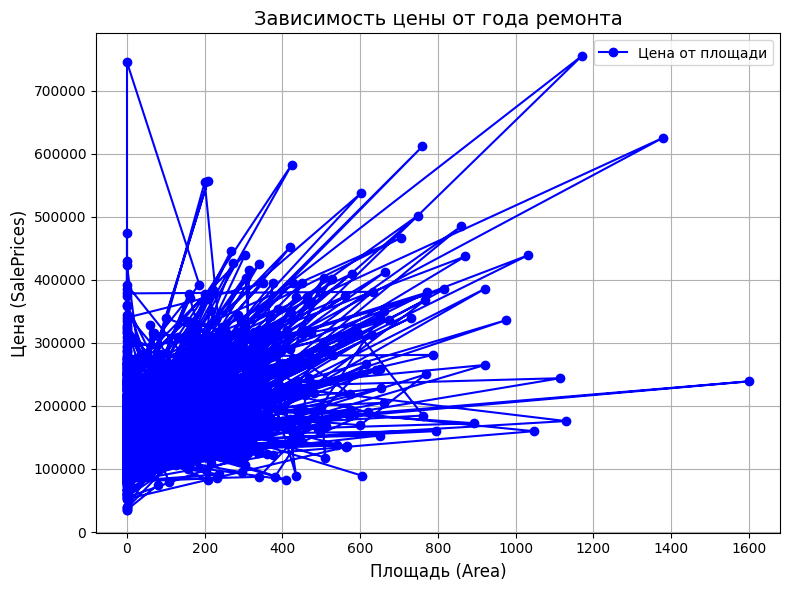

In [41]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(train_df['MasVnrArea'], train_df['SalePrice'], marker='o', linestyle='-', color='b', label='Цена от площади')

# Настройка графика
plt.title('Зависимость цены от года ремонта', fontsize=14)
plt.xlabel('Площадь (Area)', fontsize=12)
plt.ylabel('Цена (SalePrices)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Показ графика
plt.show()

### Сопоставление категориальных и числовых признаков

In [5]:
to_delete = ['MSSubClass', 'Alley', 'LandContour', 'LandSlope', 'LotConfig', 'Street', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',  'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',  'BsmtUnfSF', 'Electrical', 'LowQualFinSF', 'FullBath', 'HalfBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleCondition', 'Condition2']

In [6]:
train_df = train_df.drop('Id', axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((1460, 80), (1459, 80))

In [7]:
train_df = train_df.drop(to_delete, axis=1)
test_df = test_df.drop(to_delete, axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((1460, 28), (1459, 28))

In [8]:
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,RL,65.0,8450,Reg,AllPub,CollgCr,Norm,7,2003,196.0,...,1710,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,RL,80.0,9600,Reg,AllPub,Veenker,Feedr,6,1976,0.0,...,1262,0,TA,1,TA,460,NaN,2007,WD,181500
2,RL,68.0,11250,IR1,AllPub,CollgCr,Norm,7,2002,162.0,...,1786,1,Gd,1,TA,608,NaN,2008,WD,223500
3,RL,60.0,9550,IR1,AllPub,Crawfor,Norm,7,1970,0.0,...,1717,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,RL,84.0,14260,IR1,AllPub,NoRidge,Norm,8,2000,350.0,...,2198,1,Gd,1,TA,836,NaN,2008,WD,250000


In [9]:
MSZOning_mapping = {"C (all)	": 1, "RM": 2, "RH": 3, "RL":4, "FV": 5}
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].map(MSZOning_mapping)
    dataset['MSZoning'] = dataset['MSZoning'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,Reg,AllPub,CollgCr,Norm,7,2003,196.0,...,1710,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,Reg,AllPub,Veenker,Feedr,6,1976,0.0,...,1262,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,IR1,AllPub,CollgCr,Norm,7,2002,162.0,...,1786,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,IR1,AllPub,Crawfor,Norm,7,1970,0.0,...,1717,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,IR1,AllPub,NoRidge,Norm,8,2000,350.0,...,2198,1,Gd,1,TA,836,NaN,2008,WD,250000


In [10]:
lotShape = {"Reg": 0, "IR1": 1, "IR2": 1, "IR3": 1}
for dataset in combine:
    dataset['LotShape'] = dataset['LotShape'].map(lotShape)
    dataset['LotShape'] = dataset['LotShape'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,AllPub,CollgCr,Norm,7,2003,196.0,...,1710,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,AllPub,Veenker,Feedr,6,1976,0.0,...,1262,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,AllPub,CollgCr,Norm,7,2002,162.0,...,1786,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,AllPub,Crawfor,Norm,7,1970,0.0,...,1717,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,AllPub,NoRidge,Norm,8,2000,350.0,...,2198,1,Gd,1,TA,836,NaN,2008,WD,250000


In [11]:
Utilities_mapping = {"NoSeWa": 0, "AllPub": 1}
for dataset in combine:
    dataset['Utilities'] = dataset['Utilities'].map(Utilities_mapping)
    dataset['Utilities'] = dataset['Utilities'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,CollgCr,Norm,7,2003,196.0,...,1710,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,Veenker,Feedr,6,1976,0.0,...,1262,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,CollgCr,Norm,7,2002,162.0,...,1786,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,Crawfor,Norm,7,1970,0.0,...,1717,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,NoRidge,Norm,8,2000,350.0,...,2198,1,Gd,1,TA,836,NaN,2008,WD,250000


In [12]:
Neighborhood_mapping = {"MeadowV": 1, "IDOTRR": 1, "BrDale": 1, "BrkSide": 2, "Edwards": 2, "OldTown": 2, "Sawyer": 2, "Blueste": 2, "SWISU": 2, "NPkVill": 2, "NAmes": 2, "Mitchel": 3, "SawyerW": 3, "NWAmes": 3,
                        "Gilbert": 4, "Blmngtn": 4, "CollgCr": 4, "Crawfor": 4, "ClearCr": 4, "Somerst": 4, "Veenker": 4,
                        "Timber": 5, "StoneBr": 5, "NridgHt": 5, "NoRidge": 5}
for dataset in combine:
    dataset['Neighborhood'] = dataset['Neighborhood'].map(Neighborhood_mapping)
    dataset['Neighborhood'] = dataset['Neighborhood'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,Norm,7,2003,196.0,...,1710,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,Feedr,6,1976,0.0,...,1262,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,Norm,7,2002,162.0,...,1786,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,Norm,7,1970,0.0,...,1717,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,Norm,8,2000,350.0,...,2198,1,Gd,1,TA,836,NaN,2008,WD,250000


In [13]:
train_df['YearRemodAdd'] = np.where(train_df['YearRemodAdd'] > 2000, 1, 0)

In [14]:
test_df['YearRemodAdd'] = np.where(test_df['YearRemodAdd'] > 2000, 1, 0)

In [15]:
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,Norm,7,1,196.0,...,1710,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,Feedr,6,0,0.0,...,1262,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,Norm,7,1,162.0,...,1786,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,Norm,7,0,0.0,...,1717,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,Norm,8,0,350.0,...,2198,1,Gd,1,TA,836,NaN,2008,WD,250000


In [16]:
train_df[['1stFlrSF', 'SalePrice']].groupby(['1stFlrSF'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,1stFlrSF,SalePrice
745,2444,755000.0
744,2411,745000.0
686,1831,625000.0
741,2364,611657.0
713,1992,556581.0
...,...,...
1,372,55000.0
42,693,52500.0
26,649,40000.0
0,334,39300.0


In [17]:
train_df[['2ndFlrSF', 'SalePrice']].groupby(['2ndFlrSF'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,2ndFlrSF,SalePrice
415,1872,755000.0
416,2065,745000.0
413,1796,625000.0
330,1088,582933.0
411,1589,538000.0
...,...,...
1,110,79900.0
61,524,79000.0
31,430,68400.0
39,455,66500.0


In [18]:
train_df['1stFlrSF'] = train_df['1stFlrSF'].map(int) + train_df['2ndFlrSF'].map(int) 
train_df[['1stFlrSF', 'SalePrice']].groupby(['1stFlrSF'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,1stFlrSF,SalePrice
858,4316,755000.0
859,4476,745000.0
857,3627,625000.0
774,2364,611657.0
840,2822,582933.0
...,...,...
9,693,52500.0
14,729,52000.0
292,1317,40000.0
0,334,39300.0


In [19]:
test_df['1stFlrSF'] = test_df['1stFlrSF'].map(int) + test_df['2ndFlrSF'].map(int)

In [20]:
train_df = train_df.drop(['2ndFlrSF'], axis=1)
test_df = test_df.drop(['2ndFlrSF'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((1460, 27), (1459, 27))

In [21]:
train_df = train_df.rename(columns={"1stFlrSF": "TotalFlrSF"})
train_df[['TotalFlrSF', 'SalePrice']].groupby(['TotalFlrSF'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,TotalFlrSF,SalePrice
858,4316,755000.0
859,4476,745000.0
857,3627,625000.0
774,2364,611657.0
840,2822,582933.0
...,...,...
9,693,52500.0
14,729,52000.0
292,1317,40000.0
0,334,39300.0


In [22]:
test_df = test_df.rename(columns={"1stFlrSF": "TotalFlrSF"})

In [23]:
train_df['GrLivArea'] = np.where(train_df['GrLivArea'] >= 1400, 1, 0)
test_df['GrLivArea'] = np.where(test_df['GrLivArea'] >= 1400, 1, 0)
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,Norm,7,1,196.0,...,1,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,Feedr,6,0,0.0,...,0,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,Norm,7,1,162.0,...,1,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,Norm,7,0,0.0,...,1,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,Norm,8,0,350.0,...,1,1,Gd,1,TA,836,NaN,2008,WD,250000


In [24]:
condition_mapping = {"Artery": 0, "RRAe": 0, "Feedr": 0, "RRAn": 0, "RRNe": 0, "RRNn": 0, "Norm": 1, "PosN": 1, "PosA": 1}
combine = [train_df, test_df]
for dataset in combine:
    dataset['Condition1'] = dataset['Condition1'].map(condition_mapping)
    dataset['Condition1'] = dataset['Condition1'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,Gd,1,TA,836,NaN,2008,WD,250000


In [25]:
exterQual_mapping = {"Ex": 2, "Gd": 1, "TA": 1, "Fa": 0}
for dataset in combine:
    dataset['ExterQual'] = dataset['ExterQual'].map(exterQual_mapping)
    dataset['ExterQual'] = dataset['ExterQual'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,Gd,1,TA,836,NaN,2008,WD,250000


In [26]:
heating_mapping = {"Grav": 0, "Floor": 0, "Wall": 1, "GasA": 2, "GasW": 2, "OthW": 2}
for dataset in combine:
    dataset['Heating'] = dataset['Heating'].map(heating_mapping)
    dataset['Heating'] = dataset['Heating'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,Gd,1,TA,836,NaN,2008,WD,250000


In [27]:
heatingQC_mapping = {"Ex": 2, "Gd": 1, "TA": 1, "Fa": 0, "Po": 0}
for dataset in combine:
    dataset['HeatingQC'] = dataset['HeatingQC'].map(heatingQC_mapping)
    dataset['HeatingQC'] = dataset['HeatingQC'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,Gd,1,TA,836,NaN,2008,WD,250000


In [28]:
centralAir_mapping = {"N": 0, "Y": 1}
for dataset in combine:
    dataset['CentralAir'] = dataset['CentralAir'].map(centralAir_mapping)
    dataset['CentralAir'] = dataset['CentralAir'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,Gd,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,TA,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,Gd,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,Gd,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,Gd,1,TA,836,NaN,2008,WD,250000


In [29]:
kitchenQual_mapping = {"Ex": 3, "Gd": 2, "TA": 1, "Fa": 0, "PO": 0}
for dataset in combine:
    dataset['KitchenQual'] = dataset['KitchenQual'].map(kitchenQual_mapping)
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,2,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,1,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,2,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,2,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,2,1,TA,836,NaN,2008,WD,250000


In [30]:
train_df['BsmtFullBath'] = np.where(train_df['BsmtFullBath'] > 0, 1, 0)
test_df['BsmtFullBath'] = np.where(test_df['BsmtFullBath'] > 0, 1, 0)
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,2,0,NaN,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,1,1,TA,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,2,1,TA,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,2,1,Gd,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,2,1,TA,836,NaN,2008,WD,250000


In [31]:
FireplaceQu_mapping = {"Ex": 3, "Gd": 2, "TA": 1, "Fa": 0, "PO": 0}
for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].map(FireplaceQu_mapping)
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageArea,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,2,0,0.0,548,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,1,1,1.0,460,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,2,1,1.0,608,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,2,1,2.0,642,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,2,1,1.0,836,NaN,2008,WD,250000


In [32]:
train_df['GarageArea'] = np.where(train_df['GarageArea'] > 0, 1, 0)
test_df['GarageArea'] = np.where(test_df['GarageArea'] > 0, 1, 0)

train_df = train_df.rename(columns={"GarageArea": "IsGarage"})
test_df = test_df.rename(columns={"GarageArea": "IsGarage"})
combine = [train_df, test_df]
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,IsGarage,PoolQC,YrSold,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1,1,2,0,0.0,1,NaN,2008,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,0,0,1,1,1.0,1,NaN,2007,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1,1,2,1,1.0,1,NaN,2008,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1,1,2,1,2.0,1,NaN,2006,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,1,1,2,1,1.0,1,NaN,2008,WD,250000


In [33]:
train_df = train_df.drop(['PoolQC'], axis=1)
test_df = test_df.drop(['PoolQC'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((1460, 26), (1459, 26))

In [34]:
train_df['YrSold'] = np.where(train_df['YrSold'] >= 2008, 1, 0)
test_df['YrSold'] = np.where(test_df['YrSold'] >= 2008, 1, 0)
train_df = train_df.rename(columns={"YrSold": "YrSold2008"})
test_df = test_df.rename(columns={"YrSold": "YrSold2008"})
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,TotalFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,IsGarage,YrSold2008,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1710,1,1,2,0,0.0,1,1,WD,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,1262,0,0,1,1,1.0,1,0,WD,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1786,1,1,2,1,1.0,1,1,WD,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1717,1,1,2,1,2.0,1,0,WD,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,2198,1,1,2,1,1.0,1,1,WD,250000


In [35]:
saleType_mapping = {"Oth": 1, "ConLD": 1, "ConLw": 1, "COD": 1, "WD": 2, "ConLI": 3, "CWD": 4, "Con": 4, "New": 5}
combine = [train_df, test_df]
for dataset in combine:
    dataset['SaleType'] = dataset['SaleType'].map(saleType_mapping)
    dataset['SaleType'] = dataset['SaleType'].fillna(0)

train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,TotalFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,IsGarage,YrSold2008,SaleType,SalePrice
0,4.0,65.0,8450,0,1,4,1,7,1,196.0,...,1710,1,1,2,0,0.0,1,1,2,208500
1,4.0,80.0,9600,0,1,4,0,6,0,0.0,...,1262,0,0,1,1,1.0,1,0,2,181500
2,4.0,68.0,11250,1,1,4,1,7,1,162.0,...,1786,1,1,2,1,1.0,1,1,2,223500
3,4.0,60.0,9550,1,1,4,1,7,0,0.0,...,1717,1,1,2,1,2.0,1,0,2,140000
4,4.0,84.0,14260,1,1,5,1,8,0,350.0,...,2198,1,1,2,1,1.0,1,1,2,250000


In [36]:
train_df = train_df.drop(['BsmtCond'], axis=1)
test_df = test_df.drop(['BsmtCond'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((1460, 25), (1459, 25))

In [37]:
train_df = train_df.drop(['Fireplaces', 'FireplaceQu'], axis=1)
test_df = test_df.drop(['Fireplaces', 'FireplaceQu'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((1460, 23), (1459, 23))

In [38]:
train_df.tail()

,MSZoning,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,Condition1,OverallQual,YearRemodAdd,MasVnrArea,...,HeatingQC,CentralAir,TotalFlrSF,GrLivArea,BsmtFullBath,KitchenQual,IsGarage,YrSold2008,SaleType,SalePrice
1455,4.0,62.0,7917,0,1,4,1,6,0,0.0,...,2,1,1647,1,0,1,1,0,2,175000
1456,4.0,85.0,13175,0,1,3,1,6,0,119.0,...,1,1,2073,1,1,1,1,1,2,210000
1457,4.0,66.0,9042,0,1,4,1,7,1,0.0,...,2,1,2340,1,0,2,1,1,2,266500
1458,4.0,68.0,9717,0,1,2,1,5,0,0.0,...,1,1,1078,0,1,2,1,1,2,142125
1459,4.0,75.0,9937,0,1,2,1,5,0,0.0,...,1,1,1256,0,1,1,1,1,2,147500


In [39]:
train_df.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   float64
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   LotShape      1460 non-null   int64  
 4   Utilities     1460 non-null   int64  
 5   Neighborhood  1460 non-null   int64  
 6   Condition1    1460 non-null   int64  
 7   OverallQual   1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   MasVnrArea    1452 non-null   float64
 10  ExterQual     1460 non-null   int64  
 11  TotalBsmtSF   1460 non-null   int64  
 12  Heating       1460 non-null   int64  
 13  HeatingQC     1460 non-null   int64  
 14  CentralAir    1460 non-null   int64  
 15  TotalFlrSF    1460 non-null   int64  
 16  GrLivArea     1460 non-null   int64  
 17  BsmtFullBath  1460 non-null   int64  
 18  KitchenQual   1460 non-null 

**Заполнение числового непрерывного признака**\
Теперь нам следует приступить к оценке и заполнению признаков с пропущенными или нулевыми значениями.

In [40]:
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(), inplace=True)

train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace=True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(), inplace=True)

C:\Users\Artvl\AppData\Local\Temp\ipykernel_6084\3989991925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)
C:\Users\Artvl\AppData\Local\Temp\ipykernel_6084\3989991925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [41]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

### Моделировать, прогнозировать и решать

In [42]:
train_df.shape, test_df.shape

((1460, 23), (1459, 23))

In [43]:
train_df.drop(train_df.tail(1).index,inplace=True) # drop last 1 rows
train_df.shape, test_df.shape # <- чтобы было в обоих файлах по 1459 строк

((1459, 23), (1459, 23))

In [44]:
X_train = train_df.drop("SalePrice", axis=1)
Y_train = train_df["SalePrice"]
X_test  = test_df.drop("Id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1459, 22), (1459,), (1459, 22))

In [45]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\Users\Artvl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.44

In [50]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.66

In [56]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [47]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.66

In [58]:
from sklearn.metrics import root_mean_squared_error

print (f" root_mean_squared_error:  {root_mean_squared_error(Y_train, Y_pred)}")

 root_mean_squared_error:  112501.16908496809


In [59]:
from sklearn.metrics import mean_absolute_error

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [60]:
# сравните MAE с различными значениями max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, Y_train, Y_pred)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  32656
Max leaf nodes: 50  		 Mean Absolute Error:  18440
Max leaf nodes: 500  		 Mean Absolute Error:  7006
Max leaf nodes: 5000  		 Mean Absolute Error:  5221


In [63]:
# Выберите модель с параметром best_tree_size. Укажите аргумент, чтобы выбрать оптимальный размер
final_model = DecisionTreeRegressor(max_leaf_nodes=5000, random_state=1)

final_model.fit(X_train, Y_train)
Y_pred = final_model.predict(X_test)
acc_decision_tree = round(final_model.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [65]:
print (f" root_mean_squared_error:  {root_mean_squared_error(Y_train, Y_pred)}")

 root_mean_squared_error:  111975.10771379244


In [67]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('submission.csv', index=False)
submission

,Id,SalePrice
0,1461,128500.0
1,1462,177000.0
2,1463,181000.0
3,1464,216500.0
4,1465,254000.0
...,...,...
1454,2915,88000.0
1455,2916,88000.0
1456,2917,143500.0
1457,2918,119500.0
